<a href="https://colab.research.google.com/github/CBJtech/Blog/blob/main/Pneumonia_Detection_on_Chest_X_Rays_With_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chernobasirujallow","key":"81a9adfb9a05966b67bcfe83fbe78e7f"}'}

In [ ]:
#!mv kaggle\(1\).json kaggle.json

In [2]:
#moving the file to the correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#verifying its there
!ls ~/.kaggle


kaggle.json


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 98% 2.26G/2.29G [00:17<00:00, 45.9MB/s]
100% 2.29G/2.29G [00:17<00:00, 140MB/s] 


In [5]:
!unzip -q chest-xray-pneumonia.zip -d chest_xray_data


In [6]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [7]:
from fastai.vision.all import *
path = Path('chest_xray_data/chest_xray')
path.ls()

(#5) [Path('chest_xray_data/chest_xray/test'),Path('chest_xray_data/chest_xray/chest_xray'),Path('chest_xray_data/chest_xray/train'),Path('chest_xray_data/chest_xray/val'),Path('chest_xray_data/chest_xray/__MACOSX')]

In [8]:
(path/'train').ls()


(#2) [Path('chest_xray_data/chest_xray/train/PNEUMONIA'),Path('chest_xray_data/chest_xray/train/NORMAL')]

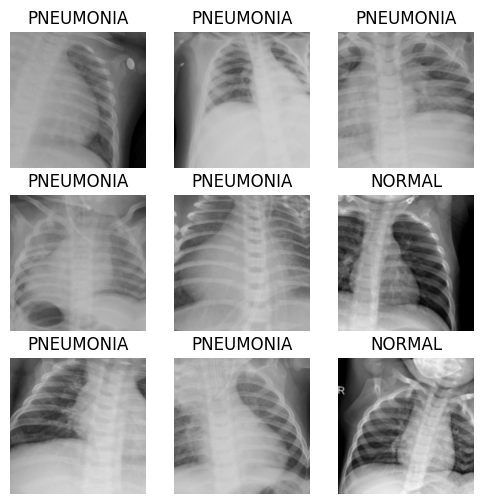

In [9]:
dls = ImageDataLoaders.from_folder(
    path/'train',
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1.0),
    bs=32
)
dls.show_batch(max_n=9, figsize=(6,6))

In [10]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 159MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.430913,0.271273,0.923298,01:37


epoch,train_loss,valid_loss,accuracy,time
0,0.236923,0.302122,0.926175,01:42
1,0.139767,0.097741,0.967402,01:38
2,0.085034,0.099397,0.966443,01:42


In [11]:
!ls

chest_xray_data  chest-xray-pneumonia.zip  kaggle.json	sample_data


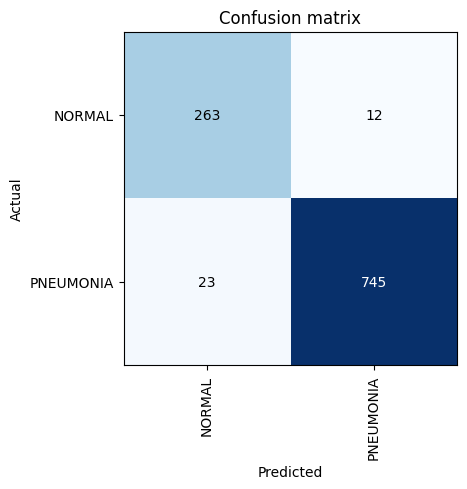

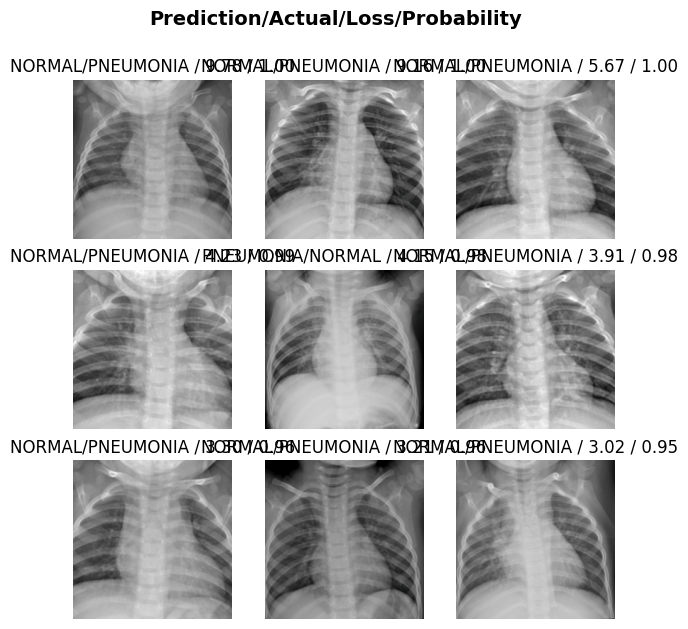

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(9, figsize=(7,7))


Saving Musa xray.webp to Musa xray.webp


Prediction: PNEUMONIA; Probability: 0.9769


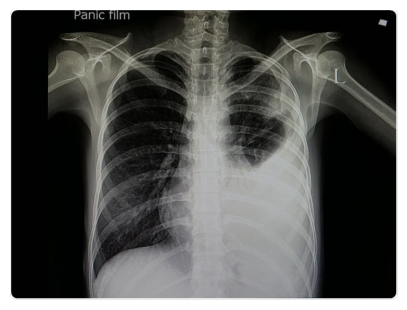

In [13]:
uploaded = files.upload()

for fn in uploaded.keys():
  img = PILImage.create(fn)
  pred_class, pred_idx, probs = learn.predict(img)
  print(f"Prediction: {pred_class}; Probability: {probs[pred_idx]:.4f}")
  img.show()


In [ ]:
#import torch
#torch.save(learn.model.state_dict(), 'model_weights.pth')

In [14]:
learn.export('pneumonia_model.pkl')

In [15]:
!find . -name "*.pkl"


./chest_xray_data/chest_xray/train/pneumonia_model.pkl


In [16]:
!ls

 chest_xray_data	    kaggle.json       sample_data
 chest-xray-pneumonia.zip  'Musa xray.webp'


In [17]:
from google.colab import files
files.download('./chest_xray_data/chest_xray/train/pneumonia_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00


In [19]:
from fastai.vision.all import *
import gradio as gr

learn = load_learner('./chest_xray_data/chest_xray/train/pneumonia_model.pkl')

def predict(img):
    pred, idx, probs = learn.predict(img)
    return f"Prediction: {pred}", {learn.dls.vocab[i]: float(probs[i]) for
                                   i in range(len(probs))}

gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=["text", "label"],
    title="Pneumonia Detection from Chest X-ray by Cherno Basiru Jallow",
    description="Upload a chest X-ray image to check if it shows signs f pneumonia.",
    live=False
).launch(share=True)


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://77a58828c381b0a9fe.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
